# Task

Suppose you are working on a project with the Irish Energy Department and have
access to data records on country-wide consumption and renewable energy power
production. You need to develop a proof of concept to **predict power consumption and
generation per day**. You also need to provide an analysis answering if green energy could
satisfy demand by itself or if other sources are also necessary.

What do you propose? What other data sources could you use to enrich the current data set
and improve the results? Make sure to mention any assumptions made.

* Create models to predict the data consumption and generation for a given date.
* Your solution should tackle the problem using Machine Learning libraries in **Python**.
* Present relevant statistics from the dataset. Use visualizations or plots to make it
more understandable for non-technical audiences. Using model **explainability**
libraries will be a plus.
* Final results should be provided using **at least two** different **performance metrics**.
Justify the reasoning behind this selection.
* Solutions involving model compression or other techniques to improve model
tradeoffs between computational cost and predictive accuracy will receive extra
credit.
* Document any hard limits of your work and any assumptions made. Also, add
comments or markdowns in your code for better readability.
* Explain your strategy and the inner workings of the models chosen.

# Response:

Thank you very much for your task. I have written and provide necessary explanation for addressing the problem. 

In [33]:
'''
The python libraries are imported as below. 

'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Dataset Loading

In [34]:
df= pd.read_csv('greenEnergy.csv')

### Data types

In [35]:
df.dtypes

Date            object
Consumption    float64
Wind           float64
Solar          float64
Wind+Solar     float64
dtype: object

The loaded data contains Date, Consumption, Wind, Solar, Wind+Solar columns with object, float, float, float, float data types respectively.

# Descriptive Analysis

In [36]:
df.describe(include="all")

,Date,Consumption,Wind,Solar,Wind+Solar
count,4383,4383.000000,2920.000000,2188.000000,2187.000000
unique,4383,NaN,NaN,NaN,NaN
top,2006-01-01,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
mean,NaN,1338.675836,164.814173,89.258695,272.663481
std,NaN,165.775710,143.692732,58.550099,146.319884
min,NaN,842.395000,5.757000,1.968000,21.478000
25%,NaN,1217.859000,62.353250,35.179250,172.185500
50%,NaN,1367.123000,119.098000,86.407000,240.991000
75%,NaN,1457.761000,217.900250,135.071500,338.988000


Our energy data is often known as time-series data. The Statistical Summary describe count, mean, standard deviation, minimum, maximum and percantile values of the series. The Date and Consumption series has 4383 recorded observation whereas Wind, Solar and Wind + Solar has only 2920, 2188, 2187 recorded observation, respectively. 

# Converting to timestamps

In [37]:
df["Date"] = pd.to_datetime(df["Date"], format="%Y-%M-%d")

In [38]:
from datetime import datetime, timedelta
date_value="2006-01-01"
startDate=pd.to_datetime(date_value)
endDate = startDate + timedelta(days=len(df)-1)

In [39]:
DateSeries=pd.date_range(start=startDate, end=endDate)
df["Date"]=DateSeries

#### Any Missing Values?

Missing values in the time-series data are very important for the analysis. In this tutorial, we are going to use windo method to fill missing values in the dataframe.


In [41]:
params = ["Consumption", "Wind", "Solar", "Wind+Solar"]
filled_df=df.fillna(df.rolling(7, min_periods=1).mean())

C:\Users\skrac\AppData\Local\Temp\ipykernel_28752\3195644092.py:2: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Date'], dtype='object')
  filled_df=df.fillna(df.rolling(7, min_periods=1).mean())


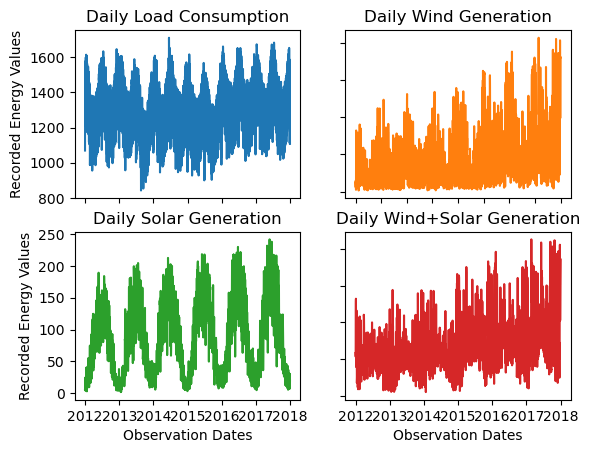

In [53]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(df["Date"], df["Consumption"])
axs[0, 0].set_title('Daily Load Consumption')
axs[0, 1].plot(df["Date"], df["Wind"], 'tab:orange')
axs[0, 1].set_title('Daily Wind Generation')
axs[1, 0].plot(df["Date"], df["Solar"], 'tab:green')
axs[1, 0].set_title('Daily Solar Generation')
axs[1, 1].plot(df["Date"], df["Wind+Solar"], 'tab:red')
axs[1, 1].set_title('Daily Wind+Solar Generation')

for ax in axs.flat:
    ax.set(xlabel='Observation Dates', ylabel='Recorded Energy Values')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [9]:
import warnings
import matplotlib
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import statsmodels.api as sm

,Date,Consumption,Wind,Solar,Wind+Solar
count,2187,2187.000000,2187.000000,2187.000000,2187.000000
unique,2187,NaN,NaN,NaN,NaN
top,2012-01-01,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
mean,NaN,1347.519037,183.431878,89.231604,272.663481
std,NaN,166.551363,153.390542,58.549772,146.319884
min,NaN,899.827000,6.511000,1.968000,21.478000
25%,NaN,1222.042000,72.367000,35.161500,172.185500
50%,NaN,1380.220000,136.842000,86.390000,240.991000
75%,NaN,1460.072500,245.027500,135.038000,338.988000


### Scatterplot Analysis

Scatterplot shows the relationship between two variables 
* Predictor/Independent variables on x-axis
* Target/dependent variables on y-axis

Text(0, 0.5, 'Wind+Solar')

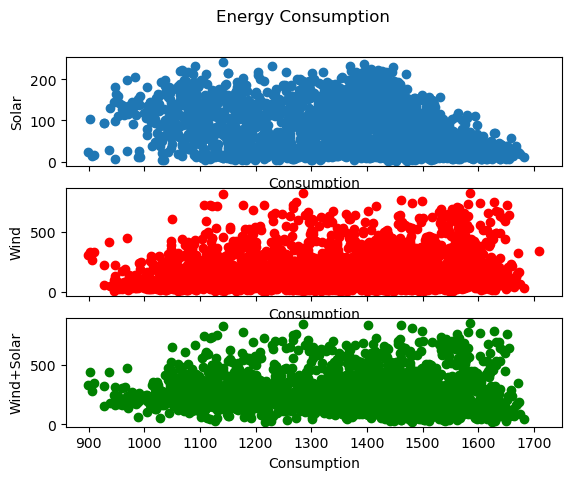

In [62]:
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True)
fig.suptitle('Energy Consumption ')
ax1.scatter(df["Consumption"], df["Solar"])
ax1.set_xlabel('Consumption')
ax1.set_ylabel('Solar')
ax2.scatter(df["Consumption"], df["Wind"], color=['red'])
ax2.set_xlabel('Consumption')
ax2.set_ylabel('Wind')
ax3.scatter(df["Consumption"], df["Wind+Solar"], color=['green'])
ax3.set_xlabel('Consumption')
ax3.set_ylabel('Wind+Solar')


In [65]:
Pearson_df=df.dropna()

In [67]:
df.corr()

C:\Users\skrac\AppData\Local\Temp\ipykernel_28752\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Consumption,Wind,Solar,Wind+Solar
Consumption,1.000000,0.136821,-0.278943,0.027648
Wind,0.136821,1.000000,-0.308832,0.924745
Solar,-0.278943,-0.308832,1.000000,0.076394
Wind+Solar,0.027648,0.924745,0.076394,1.000000


In [70]:
Pearson_df.corr()

C:\Users\skrac\AppData\Local\Temp\ipykernel_28752\3131743999.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Pearson_df.corr()


,Consumption,Wind,Solar,Wind+Solar
Consumption,1.000000,0.133076,-0.279543,0.027648
Wind,0.133076,1.000000,-0.308832,0.924745
Solar,-0.279543,-0.308832,1.000000,0.076394
Wind+Solar,0.027648,0.924745,0.076394,1.000000


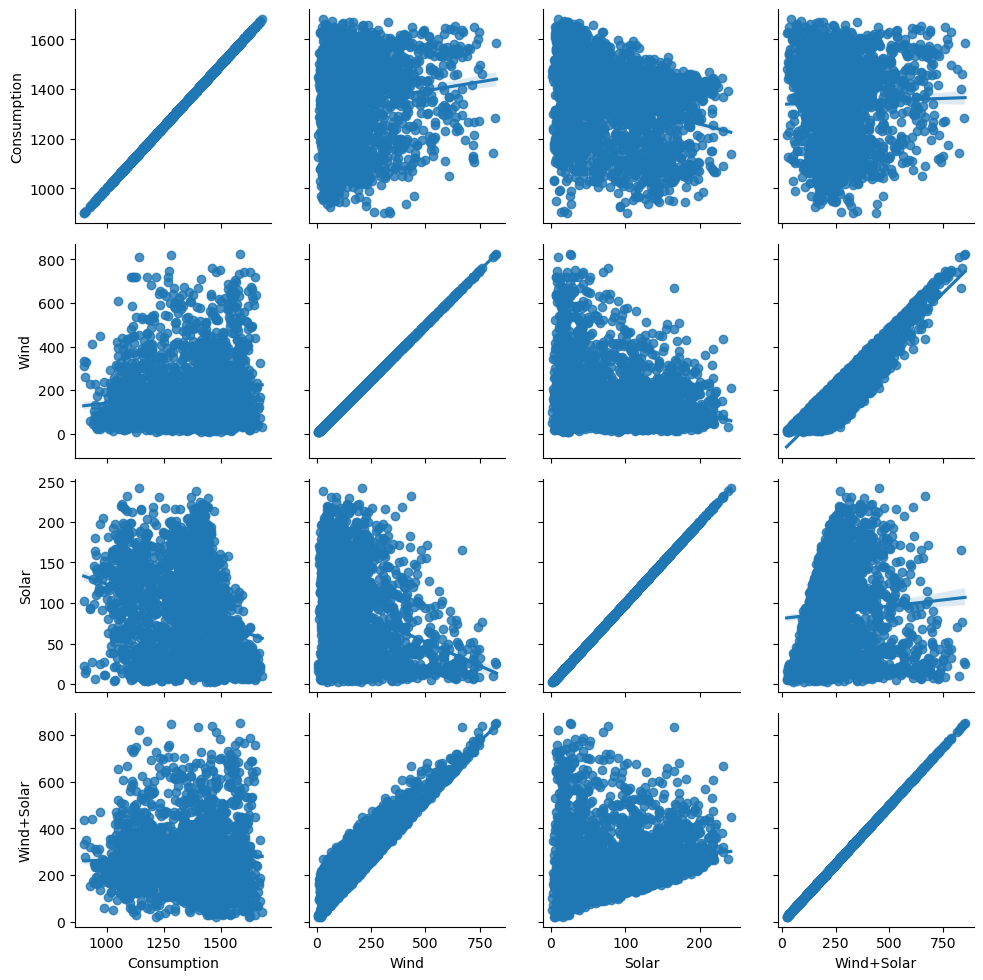

In [74]:
import seaborn as sns
g = sns.PairGrid(Pearson_df)
g.map(sns.regplot)

In [75]:
from scipy import stats
for param in ["Solar", "Wind","Wind+Solar"]:
    pearson_coef, p_value = stats.pearsonr(Pearson_df[param], Pearson_df['Consumption'])
    print("The Pearson Correlation Coefficient between Consumption and ",param," is", pearson_coef*100 , "%", " with a P-value of P =", p_value)

The Pearson Correlation Coefficient between Consumption and  Solar  is -27.95427318582823 %  with a P-value of P = 1.505758301064772e-40
The Pearson Correlation Coefficient between Consumption and  Wind  is 13.307595241745585 %  with a P-value of P = 4.1682414913764916e-10
The Pearson Correlation Coefficient between Consumption and  Wind+Solar  is 2.764784385924091 %  with a P-value of P = 0.1961945825002535


### What is Residual Plot ?

A residual plot is used to display the quality of polynomial regression. This function will regress y on x as a polynomial regression and then draw a scatterplot of the residuals.
Residuals are the differences between the observed values of the dependent variable and the predicted values obtained from the regression model. In other words, a residual is a measure of how much a regression line vertically misses a data point, meaning how far off the predictions are from the actual data points.

**Interpretation**: "Solar" has a 27.95% negative correlation with the Load consumption. The Wind has 13.30% positive correaltin with load consumption. However Wind+Solar has no correlation with load consumption.

### Autocorrelation Analysis

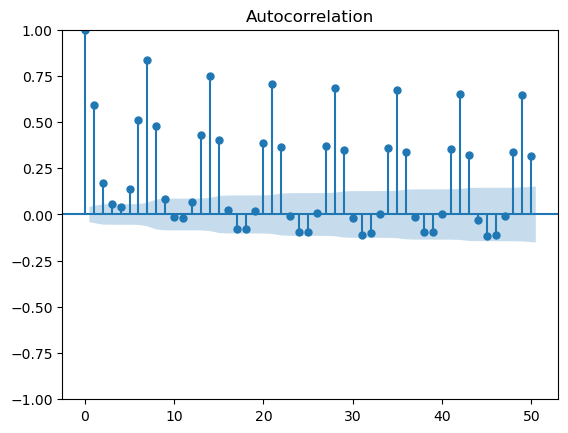

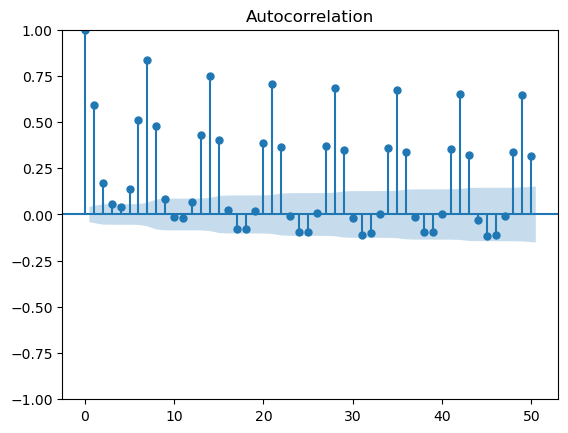

In [83]:
from statsmodels.graphics.tsaplots import plot_acf
series=Pearson_df["Consumption"].values
plot_acf(series, lags=50)

# Interpretation: 

The autocorrelation plot demonstrate there is higher correlation within consumption series when the lags values is 7. 

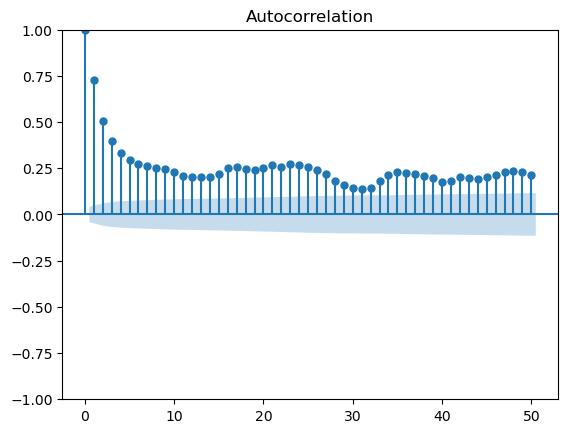

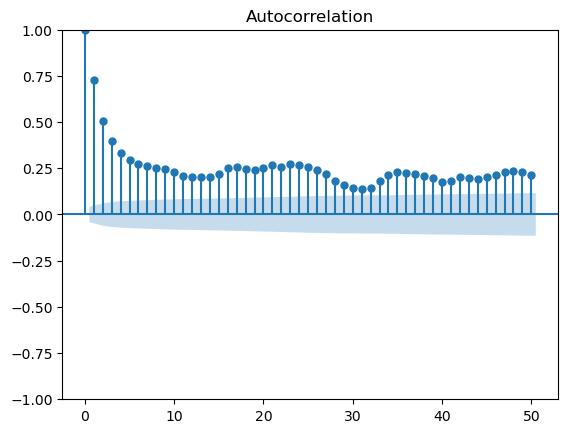

In [84]:
from statsmodels.graphics.tsaplots import plot_acf
series=Pearson_df["Wind"].values
plot_acf(series, lags=50)

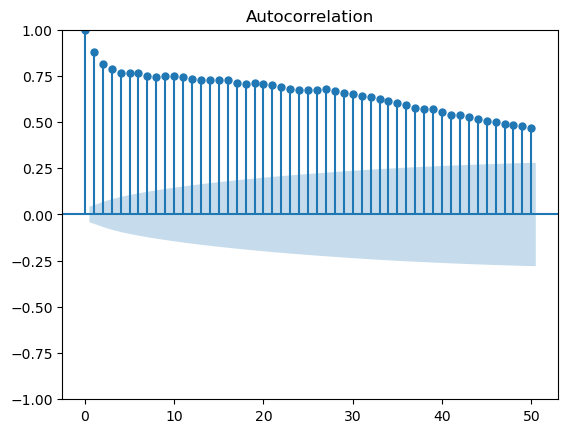

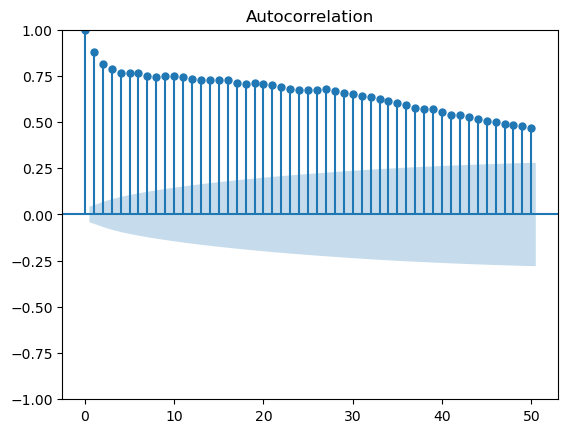

In [85]:
from statsmodels.graphics.tsaplots import plot_acf
series=Pearson_df["Solar"].values
plot_acf(series, lags=50)

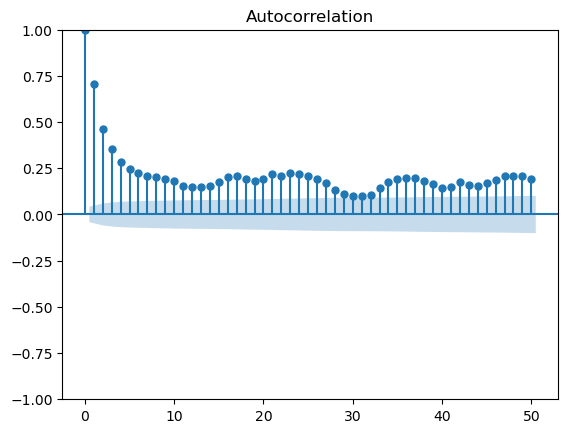

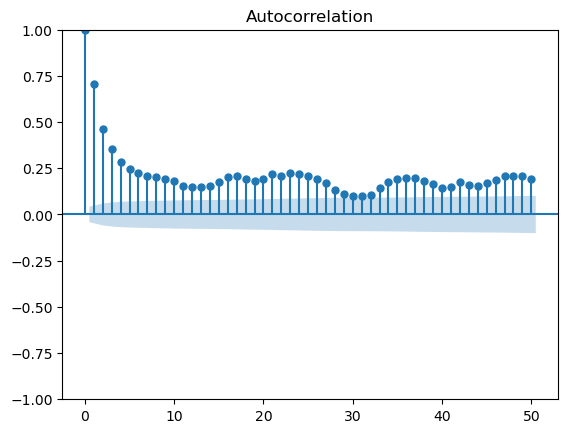

In [86]:
from statsmodels.graphics.tsaplots import plot_acf
series=Pearson_df["Wind+Solar"].values
plot_acf(series, lags=50)

In [87]:
def convertToSeries(input_series, lookback):
    matrix_load=[]
    for i in range(len(input_series)-lookback):
        matrix_load.append(np.hstack(input_series[i:i+lookback]))
    return np.array(matrix_load)

In [88]:
def Train_test_split(input_matrix, ratio):
    
    train_len=int(ratio*len(matrix_array))
    print(train_len)
    print(input_matrix.shape)
    X_train=input_matrix[:train_len,:-1]
    y_train=input_matrix[:train_len, -1]
    X_test=input_matrix[train_len:, :-1]
    y_test=input_matrix[train_len:, -1]
    
    return X_train, y_train, X_test, y_test

In [91]:
input_vector=Pearson_df["Consumption"].values
print(type(input_vector))
matrix_array =convertToSeries(input_vector, 7)
X_train, y_train, X_test, y_test= Train_test_split(matrix_array, 0.7)

<class 'numpy.ndarray'>
1526
(2180, 7)


[ 0.56764811 -0.25201072  0.04115557  0.12686003 -0.33310589  0.70147229]
198.33275193256736


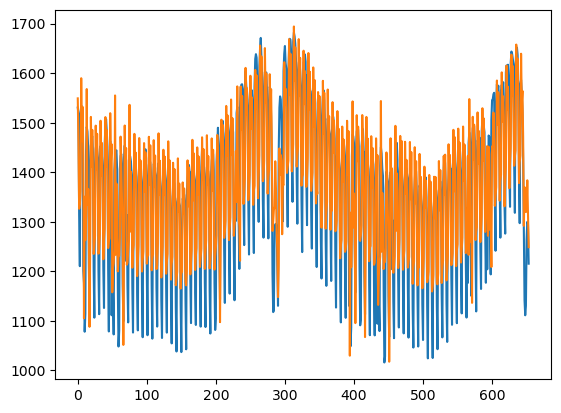

In [99]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)
print(reg.coef_)
print(reg.intercept_)
y_test= y_test.reshape(-1,1)
y_pred=reg.predict(np.array(X_test))

plt.plot(y_test, label='Actual')
plt.plot(y_pred)
plt.show()

In [101]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
Reg_mean=mean_squared_error(y_pred, y_test)
R_square= r2_score(y_pred, y_test)
print(Reg_mean)
print(R_square)

10021.745361804902
0.3601448687458967


In [106]:
from sklearn.svm import SVR
from sklearn.gaussian_process.kernels import RBF, WhiteKernel
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor



#### Convert to 2D-matrix for DL algorithms

In [41]:
from sklearn.preprocessing import StandardScaler
y_train=y_train.reshape(-1, 1)
ScalerX=StandardScaler().fit(X_train)
ScalerY=StandardScaler().fit(y_train)

In [42]:
X_train1=ScalerX.transform(X_train)
y_train1=ScalerY.transform(y_train)
X_test1=ScalerX.transform(X_test)

X_train1Reshaped=np.reshape(X_train1, (X_train.shape[0], X_train.shape[1], 1))
X_test1Reshaped=np.reshape(X_test1, (X_test.shape[0], X_test.shape[1], 1))

Now, all the feature columns has 2187 recorded historical values

# Performance Evaluation Metrics: 

## 1) Mean Squared Error

In [28]:
def mean_squared_error(y_pred, y_actual):
    result=0
    for i in range(len(y_pred)):
        result += (y_actual[i] - y_pred[i])**2
    return result/len(y_pred)

## 2) Coefficient of Determination (R^2)

* The coefficient of Determination is a measure of determining how cloe data is to the fitted regression line. 
* R^2 is the percantage of variation of the target value (y) that is explanined by the propose model 

$$ R^2 = (1- (MSE of the Regression line) / (MSE of the average of the data)$$

3.0